# Active Trains Over Time

c2c are curious about how the number of trains running varies over time.  
In particular they are interested in:
- How the number of trains running vary over a typical day
- How the number of trains running vary over the week

In [1]:
%store -r train_timings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# first we will group the data by hour and get a count of the number of unique trains recorded in that hour
# 125 is the total number of days of data
data_by_hour = pd.DataFrame()
data_by_hour['number_of_active_trains'] = train_timings.groupby('hour_of_day')['train_id'].nunique()
data_by_hour['number_of_planned_events'] = train_timings[train_timings['planned_event_type'].notnull()].groupby('hour_of_day')['hour_of_day'].count().div(125)

ModuleNotFoundError: No module named 'matplotlib'

Text(0, 0.5, 'Number of Active Trains')

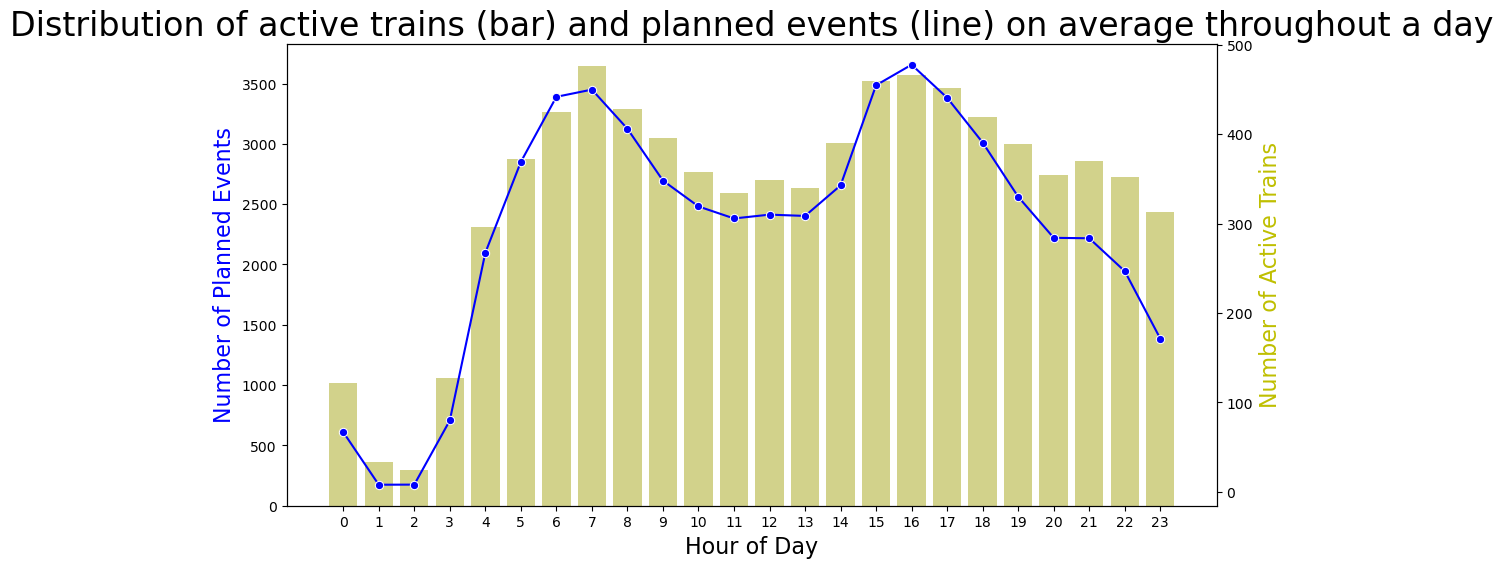

In [2]:
# we will create a bar chart of active trains and a line of planned events
# we will put them on the same chart and put different y axis on each side
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data = data_by_hour, x=data_by_hour.index.values.tolist(), y='number_of_active_trains', alpha=0.5, ax=ax1, color='y')
ax2 = ax1.twinx()

ax1.set_xlabel('Hour of Day', fontsize=16)
ax1.set_ylabel('Number of Planned Events', fontsize=16, color='b')

ax1.set_title('Distribution of active trains (bar) and planned events (line) on average throughout a day', fontsize=24)
sns.lineplot(data = data_by_hour['number_of_planned_events'], marker='o', sort = False, ax=ax2, color='b')
ax2.set_ylabel('Number of Active Trains', fontsize=16, color='y')

We can see that the distribution generally matches for planned events and active trains throughout the average day. However, after 6pm, the network seems to have an over allocation of active trains for planned events compared to other times. The most active times are 6-9am and 3-6pm which is expected as these are the times when most people are commuting to school or work.

In [3]:
# first we will get data by day
# then merge it with data by day of week
data_by_day = pd.DataFrame()
data_by_day['number_of_active_trains'] = train_timings.groupby('signal_date')['train_id'].nunique()
data_by_day['number_of_planned_events'] = train_timings[train_timings['planned_event_type'].notnull()].groupby('signal_date')['signal_date'].count()
data_by_day['day_of_week'] = data_by_day.index.to_series().dt.day_name()


data_by_dow = pd.DataFrame()
data_by_dow['avg_number_of_trains'] = data_by_day.groupby('day_of_week')['number_of_active_trains'].mean()
data_by_dow['avg_number_of_planned_events'] = data_by_day.groupby('day_of_week')['number_of_planned_events'].mean()
index_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_by_dow = data_by_dow.reindex(index_order)
data_by_dow

,avg_number_of_trains,avg_number_of_planned_events
day_of_week,,
Monday,587.000000,7674.117647
Tuesday,604.470588,7814.470588
Wednesday,617.117647,7939.352941
Thursday,606.882353,7875.058824
Friday,623.666667,8157.500000
Saturday,445.222222,7516.722222
Sunday,270.500000,4146.222222


Text(0, 0.5, 'Avg number of Active Trains')

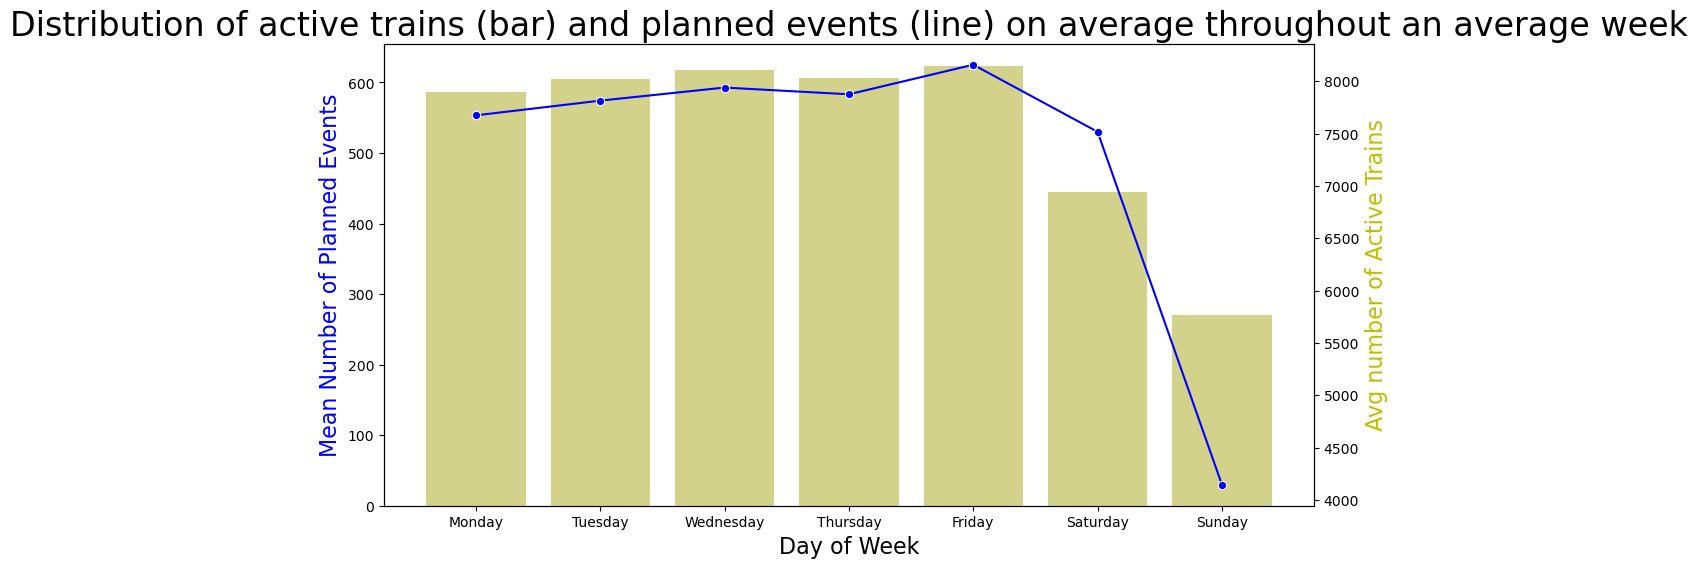

In [4]:
# we will create a similar graph to the one above
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data = data_by_dow, x=data_by_dow.index.values.tolist(), y='avg_number_of_trains', alpha=0.5, ax=ax1, color='y')
ax2 = ax1.twinx()

ax1.set_xlabel('Day of Week', fontsize=16)
ax1.set_ylabel('Mean Number of Planned Events', fontsize=16, color='b')

ax1.set_title('Distribution of active trains (bar) and planned events (line) on average throughout an average week', fontsize=24)
sns.lineplot(data = data_by_dow['avg_number_of_planned_events'], marker='o', sort = False, ax=ax2, color='b')
ax2.set_ylabel('Avg number of Active Trains', fontsize=16, color='y')

Throughout the week days there seems to be an appropriate ratio of active trains to planned events. However, there is a clearly a lack of active trains on Saturday compared to the number of active trains. 

On Sunday, there is a lack of planned events, but quite a high number of active trains. As noted when analysing data outages, this could be because there is maintenance being carried out on a Sunday.